In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import time
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import DBSCAN

## Read Dataset

# Task1

In [3]:
df2 = pd.read_csv('replace with clean_data_sh012') 

#### The Location have been transform into UTM in the Dataset

In [17]:
X = df2[['value', 'utm_x', 'utm_y']].dropna()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

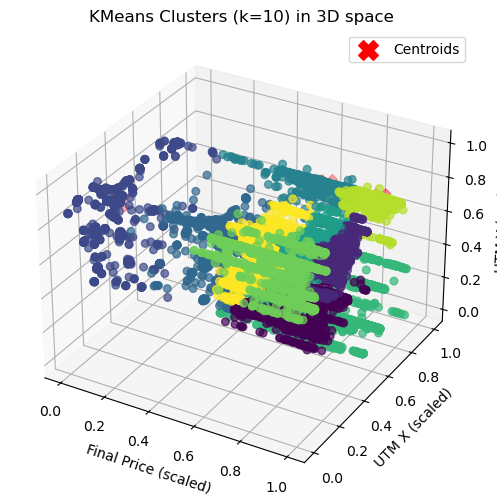

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(
    X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
    c=y_pred, cmap="viridis", s=30, alpha=0.7
)

# Centroids
ax.scatter(
    centroids[:,0], centroids[:,1], centroids[:,2],
    c="red", marker="X", s=200, label="Centroids"
)

ax.set_title(f"KMeans Clusters (k={k}) in 3D space")
ax.set_xlabel("Final Price (scaled)")
ax.set_ylabel("UTM X (scaled)")
ax.set_zlabel("UTM Y (scaled)")
ax.legend()

plt.show()